# Bitcoin

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
bitcoin = pd.read_csv('Dataset/BTC-EUR.csv', index_col='Date', parse_dates=True)

In [3]:
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-10-04,3.700,3.821,3.746,3.750,3.750,1357
2011-10-05,3.750,3.820,3.650,3.676,3.676,3349
2011-10-06,3.676,3.743,3.450,3.550,3.550,6642
2011-10-07,3.550,3.590,2.900,3.293,3.293,7135
2011-10-08,3.293,3.283,2.872,2.890,2.890,2007


In [4]:
bitcoin.describe

<bound method NDFrame.describe of                    Open         High          Low        Close    Adj Close  \
Date                                                                          
2011-10-04     3.700000     3.821000     3.746000     3.750000     3.750000   
2011-10-05     3.750000     3.820000     3.650000     3.676000     3.676000   
2011-10-06     3.676000     3.743000     3.450000     3.550000     3.550000   
2011-10-07     3.550000     3.590000     2.900000     3.293000     3.293000   
2011-10-08     3.293000     3.283000     2.872000     2.890000     2.890000   
...                 ...          ...          ...          ...          ...   
2019-09-30  7375.950195  7667.890137  7075.589844  7626.029785  7626.029785   
2019-10-01  7626.029785  7818.279785  7535.799805  7625.560059  7625.560059   
2019-10-02  7625.560059  7663.270020  7489.770020  7655.250000  7655.250000   
2019-10-03  7655.250000  7685.930176  7379.220215  7516.790039  7516.790039   
2019-10-04  7514.4

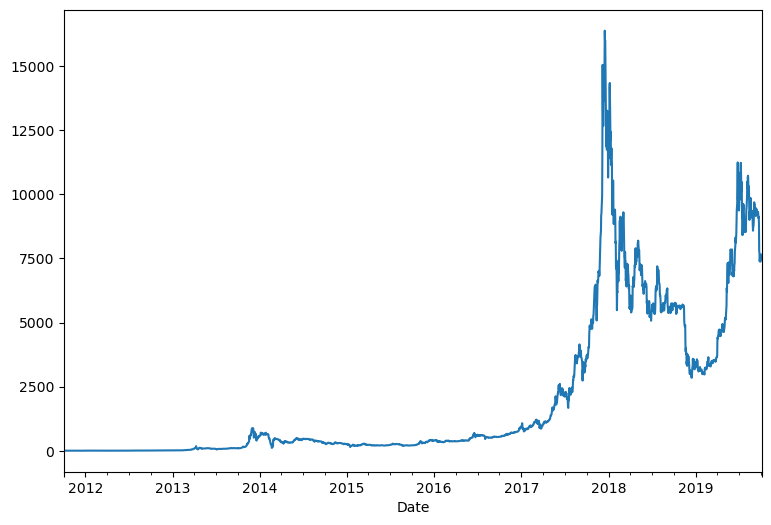

In [5]:
bitcoin['Close'].plot(figsize=(9, 6))
plt.show()

In [6]:
bitcoin.index

DatetimeIndex(['2011-10-04', '2011-10-05', '2011-10-06', '2011-10-07',
               '2011-10-08', '2011-10-09', '2011-10-10', '2011-10-11',
               '2011-10-12', '2011-10-13',
               ...
               '2019-09-25', '2019-09-26', '2019-09-27', '2019-09-28',
               '2019-09-29', '2019-09-30', '2019-10-01', '2019-10-02',
               '2019-10-03', '2019-10-04'],
              dtype='datetime64[ns]', name='Date', length=2923, freq=None)

In [7]:
bitcoin.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

<Axes: xlabel='Date'>

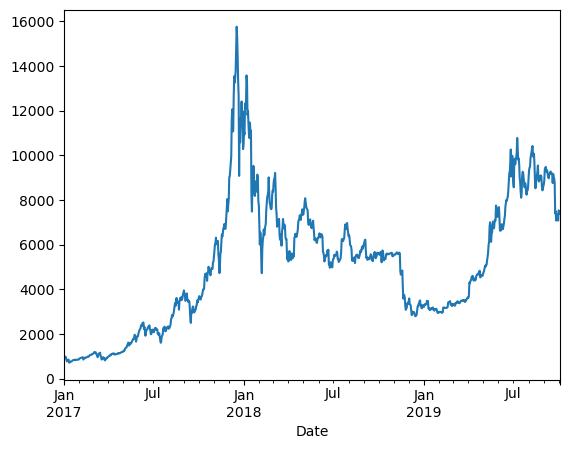

In [8]:
bitcoin.loc['2017':'2019', 'Low'].plot()

<Axes: xlabel='Date'>

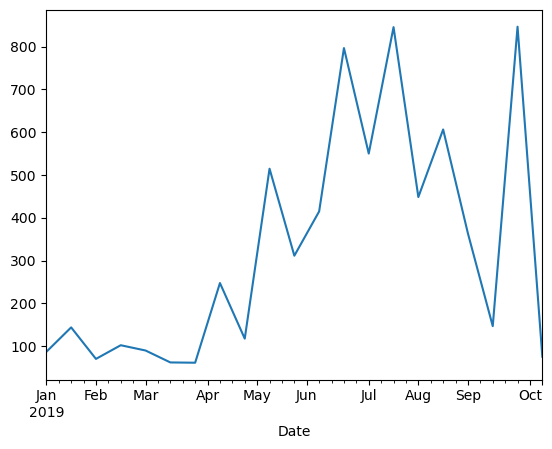

In [9]:
bitcoin.loc['2019', 'Close'].resample('2W').std().plot() 

In [10]:
print(bitcoin.index)



DatetimeIndex(['2011-10-04', '2011-10-05', '2011-10-06', '2011-10-07',
               '2011-10-08', '2011-10-09', '2011-10-10', '2011-10-11',
               '2011-10-12', '2011-10-13',
               ...
               '2019-09-25', '2019-09-26', '2019-09-27', '2019-09-28',
               '2019-09-29', '2019-09-30', '2019-10-01', '2019-10-02',
               '2019-10-03', '2019-10-04'],
              dtype='datetime64[ns]', name='Date', length=2923, freq=None)


C:\Users\bilal\AppData\Local\Temp\ipykernel_22176\2390998890.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  bitcoin.loc['2019', 'Close'].resample('M').mean().plot(label='Moyenne par Mois', lw=3, ls=':', alpha=0.8)


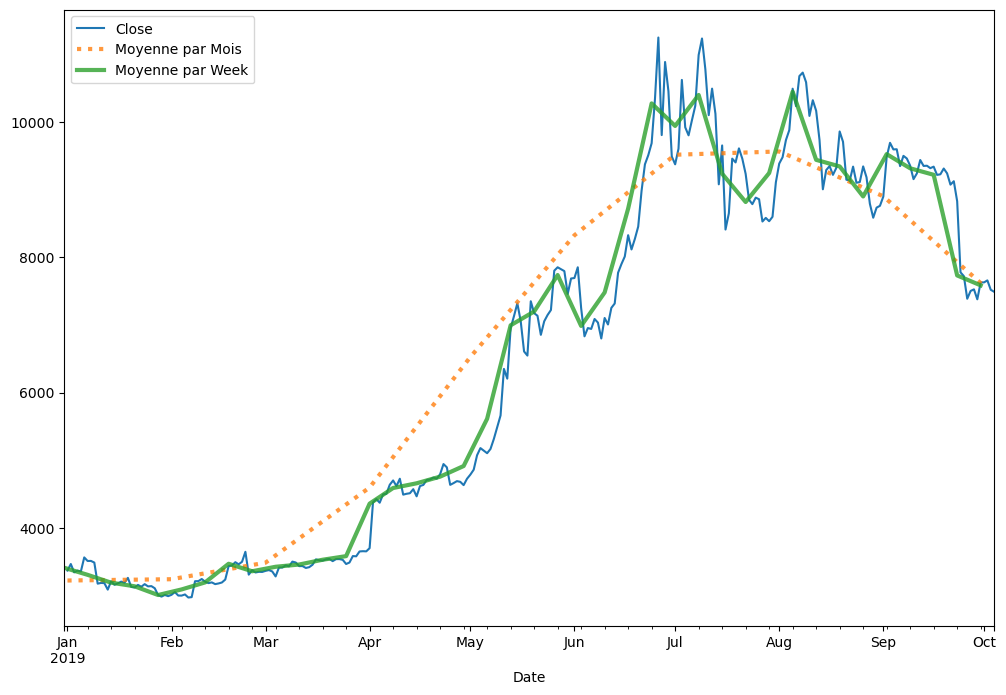

In [11]:
plt.figure(figsize=(12,8))
bitcoin.loc['2019', 'Close'].plot()
bitcoin.loc['2019', 'Close'].resample('M').mean().plot(label='Moyenne par Mois', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019', 'Close'].resample('W').mean().plot(label='Moyenne par Week', lw=3, ls='-', alpha=0.8)
plt.legend()
plt.show()

<Axes: xlabel='Date'>

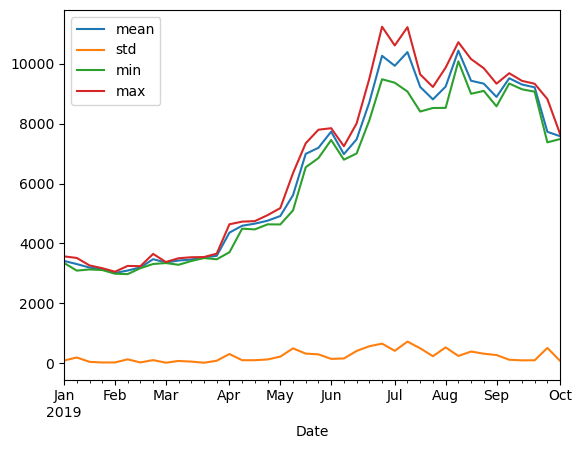

In [12]:
bitcoin.loc['2019', 'Close'].resample('W').agg(['mean', 'std', 'min', 'max']).plot()

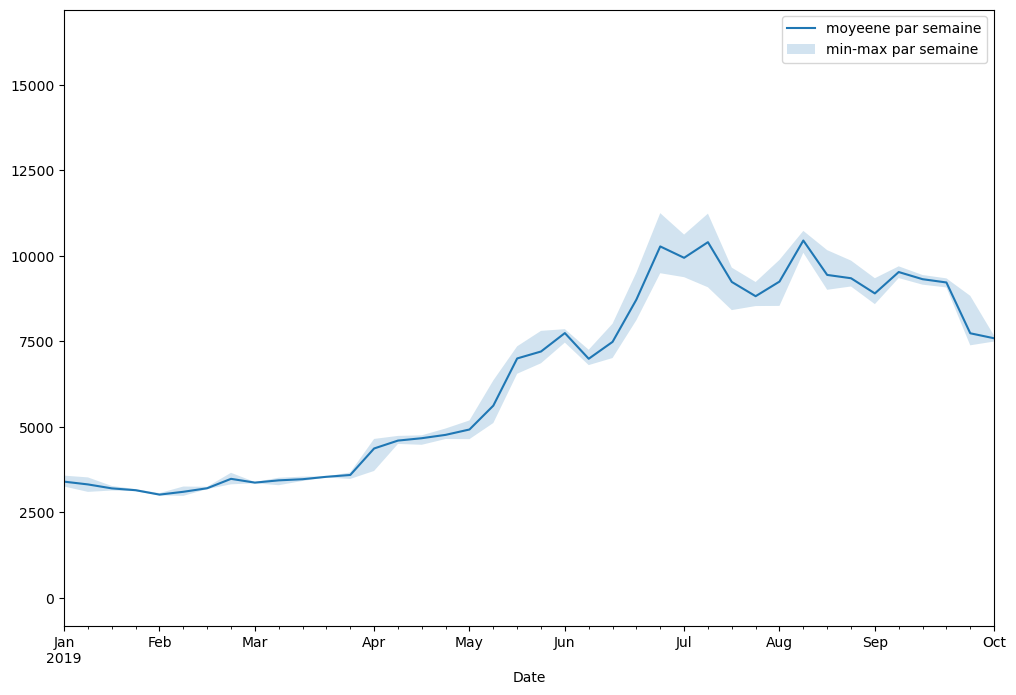

In [13]:
m = bitcoin['Close'].resample('W').agg(['mean', 'std', 'min', 'max'])

plt.figure(figsize=(12, 8))
m['mean']['2019'].plot(label='moyeene par semaine')
plt.fill_between(m.index, m['max'], m['min'], alpha=0.2, label='min-max par semaine')

plt.legend()
plt.show()

<Axes: xlabel='Date'>

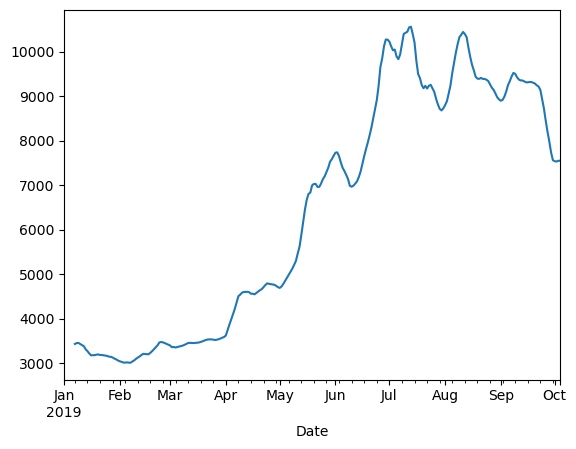

In [14]:
bitcoin.loc['2019', 'Close'].rolling(window=7).mean().plot()

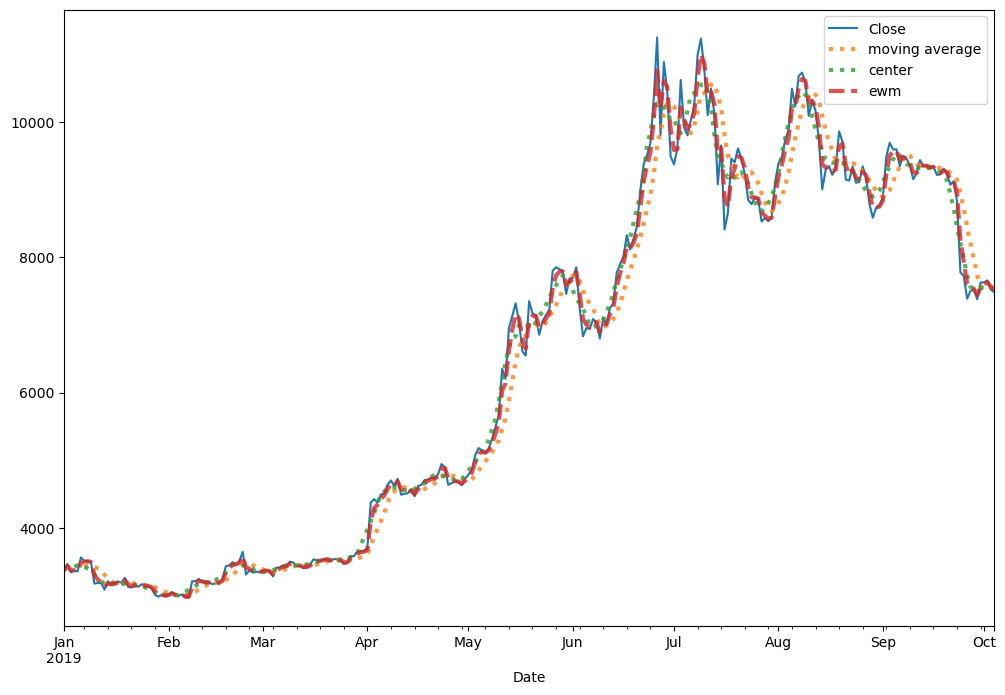

In [24]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2019', 'Close'].plot()
bitcoin.loc['2019', 'Close'].rolling(window=7).mean().plot(label='moving average', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019', 'Close'].rolling(window=7, center=True).mean().plot(label='center', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019', 'Close'].ewm(alpha=0.6).mean().plot(label='ewm', lw=3, ls='--', alpha=0.8)

plt.legend()
plt.show()


In [25]:
ethereum = pd.read_csv('Dataset/ETH-EUR.csv', index_col='Date', parse_dates=True)

<Axes: xlabel='Date'>

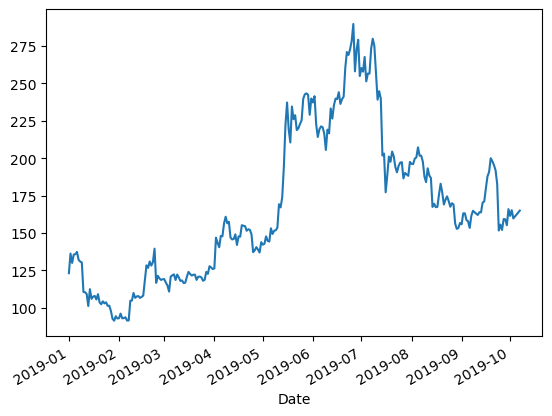

In [30]:
ethereum['Close']['2019'].plot()

In [35]:
btc_eth = pd.merge(bitcoin, ethereum, on='Date', how='inner', suffixes=('_btc', '_eth'))

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

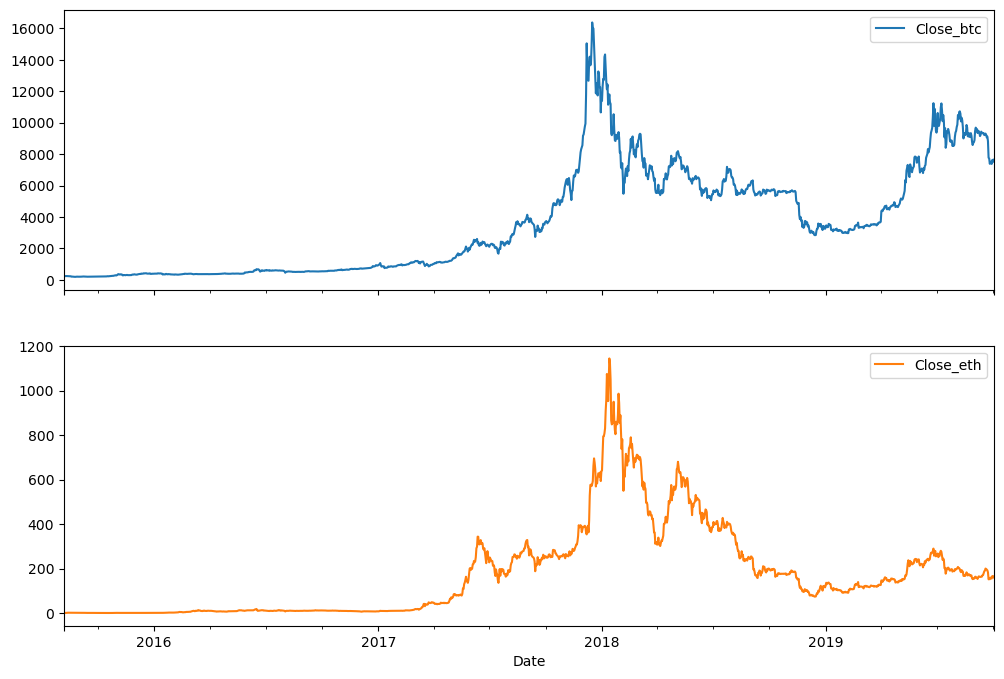

In [36]:
btc_eth[['Close_btc', 'Close_eth']].plot(subplots=True, figsize=(12, 8))

In [39]:
correlation = btc_eth[['Close_btc', 'Close_eth']].corr()

<Axes: >

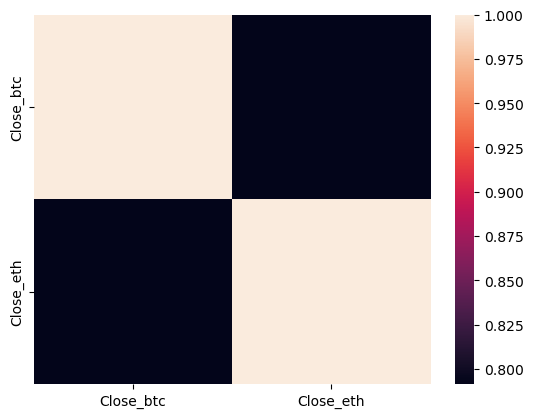

In [40]:
import seaborn as sns
sns.heatmap(correlation)

In [42]:
data = bitcoin.copy()
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-10-04,3.700000,3.821000,3.746000,3.750000,3.750000,1357
2011-10-05,3.750000,3.820000,3.650000,3.676000,3.676000,3349
2011-10-06,3.676000,3.743000,3.450000,3.550000,3.550000,6642
2011-10-07,3.550000,3.590000,2.900000,3.293000,3.293000,7135
2011-10-08,3.293000,3.283000,2.872000,2.890000,2.890000,2007
...,...,...,...,...,...,...
2019-09-30,7375.950195,7667.890137,7075.589844,7626.029785,7626.029785,101457908
2019-10-01,7626.029785,7818.279785,7535.799805,7625.560059,7625.560059,75644316
2019-10-02,7625.560059,7663.270020,7489.770020,7655.250000,7655.250000,51871334


In [44]:
data.columns
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2.923000e+03
mean,1989.933793,2052.332373,1921.136068,1992.525601,1992.525601,3.310173e+07
std,3007.007836,3112.005967,2881.927756,3008.582222,3008.582222,2.351084e+08
min,1.521000,1.649000,1.500000,1.521000,1.521000,1.470000e+02
25%,107.805001,111.944999,102.465000,108.400002,108.400002,2.756760e+05
50%,399.570007,405.850006,392.000000,399.809998,399.809998,2.049012e+06
75%,3202.104980,3285.430054,3140.775024,3207.844971,3207.844971,3.326155e+07
max,16374.540039,16670.939453,15760.450195,16376.299805,16376.299805,1.221204e+10


In [49]:
data['Buy'] = np.zeros((len(data)))
data['Sell'] = np.zeros((len(data)))

In [50]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Buy', 'Sell'], dtype='object')

In [62]:
data['RollingMax'] = data['Close'].shift(1).rolling(window=28).max()
data['RollingMin'] = data['Close'].shift(1).rolling(window=28).min()


In [63]:
data.loc[data['RollingMax'] < data['Close'], 'Buy'] = 1
data.loc[data['RollingMin'] > data['Close'], 'Sell'] = -1

In [64]:
data[''] == -1

KeyError: ''

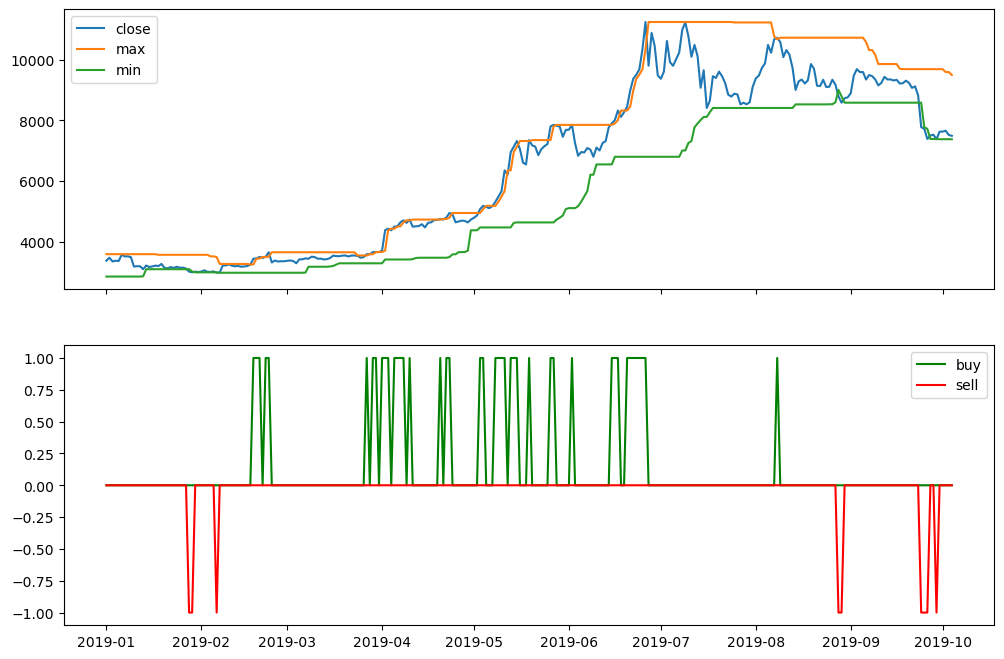

In [66]:
start = '2019'
end = '2019'
fig, ax = plt.subplots(2, figsize=(12, 8), sharex=True)
ax[0].plot(data['Close'][start:end])
ax[0].plot(data['RollingMax'][start:end])
ax[0].plot(data['RollingMin'][start:end])
ax[0].legend(['close', 'max', 'min'])
ax[1].plot(data['Buy'][start:end], c='g')
ax[1].plot(data['Sell'][start:end], c='r')
ax[1].legend(['buy', 'sell'])